In [1]:
#install Packages if needed(uncomment them run them, if needed)
#!pip install findspark
#!pip install pyspark

#!pip install jupyter
#!pip install pip
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install matplotlib-inline
#!pip install seaborn

In [2]:
#To import, enable, initalise spark into jupyter
import findspark
findspark.init()

In [3]:
#df stands for dataframe
#import the pyspark library
import pyspark
#import the SparkSession class
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello")
#execute the SQL by calling the “show” action on the DataFrame
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [4]:
#This line creates the dataframe from the csv file
df = spark.read.csv("toy_dataset.csv")
#shows the data frame(df) of the dataset
df.show()

+------+------+------+---+-------+-------+
|   _c0|   _c1|   _c2|_c3|    _c4|    _c5|
+------+------+------+---+-------+-------+
|Number|  City|Gender|Age| Income|Illness|
|     1|Dallas|  Male| 41|40367.0|     No|
|     2|Dallas|  Male| 54|45084.0|     No|
|     3|Dallas|  Male| 42|52483.0|     No|
|     4|Dallas|  Male| 40|40941.0|     No|
|     5|Dallas|  Male| 46|50289.0|     No|
|     6|Dallas|Female| 36|50786.0|     No|
|     7|Dallas|Female| 32|33155.0|     No|
|     8|Dallas|  Male| 39|30914.0|     No|
|     9|Dallas|  Male| 51|68667.0|     No|
|    10|Dallas|Female| 30|50082.0|     No|
|    11|Dallas|Female| 48|41524.0|    Yes|
|    12|Dallas|  Male| 47|54777.0|     No|
|    13|Dallas|  Male| 46|62749.0|     No|
|    14|Dallas|Female| 42|50894.0|     No|
|    15|Dallas|Female| 61|38429.0|     No|
|    16|Dallas|  Male| 43|34074.0|     No|
|    17|Dallas|  Male| 27|50398.0|     No|
|    18|Dallas|  Male| 38|46373.0|    Yes|
|    19|Dallas|  Male| 47|51137.0|     No|
+------+---

In [5]:
#We can see the schema (structure) of the DF with this function
df.printSchema()
#the below results are wrong so we need to correct it

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [6]:
df = spark.read.csv("toy_dataset.csv", inferSchema=True, header=True)
df.printSchema()

root
 |-- Number: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Income: double (nullable = true)
 |-- Illness: string (nullable = true)



In [7]:
#to return the total number of rows in the dataset
df.count()

150000

In [8]:
#Counts the number of rows where the value is Male in the dataset using .where()
df.where(df.Gender == "Male").count()

#save the filtered result into a variable to use for calculations
totalentries =df.count()

In [9]:
#df.sample to select random rows every time.df.show() will show the same

#df2 is new data frame different from df(original dataframe)
df2 = df.sample(0.01)
df2.show()

+------+------+------+---+-------+-------+
|Number|  City|Gender|Age| Income|Illness|
+------+------+------+---+-------+-------+
|    12|Dallas|  Male| 47|54777.0|     No|
|    34|Dallas|  Male| 27|56645.0|     No|
|   150|Dallas|Female| 48|42926.0|     No|
|   457|Dallas|  Male| 42|61088.0|     No|
|   631|Dallas|Female| 39|56619.0|     No|
|   708|Dallas|Female| 57|17477.0|     No|
|   964|Dallas|Female| 42|46840.0|     No|
|   992|Dallas|Female| 52|46952.0|    Yes|
|  1053|Dallas|Female| 26|48973.0|     No|
|  1082|Dallas|Female| 54|33992.0|     No|
|  1158|Dallas|  Male| 58|38383.0|     No|
|  1511|Dallas|  Male| 63|57909.0|     No|
|  1517|Dallas|  Male| 31|52079.0|     No|
|  1528|Dallas|  Male| 38|45190.0|     No|
|  1551|Dallas|  Male| 49|44323.0|     No|
|  1587|Dallas|  Male| 40|44838.0|     No|
|  1663|Dallas|Female| 25|49124.0|     No|
|  1750|Dallas|  Male| 48|39598.0|     No|
|  1770|Dallas|  Male| 45|49505.0|    Yes|
|  1855|Dallas|Female| 51|35120.0|     No|
+------+---

In [10]:
#To get the count of a group of values, we can use the “groupBy” transform

df.groupBy("City").count().show()

+---------------+-----+
|           City|count|
+---------------+-----+
|         Dallas|19707|
|    Los Angeles|32173|
|      San Diego| 4881|
|         Austin|12292|
|  New York City|50307|
|Washington D.C.| 8120|
|  Mountain View|14219|
|         Boston| 8301|
+---------------+-----+



In [11]:
#to get the total number of cities (count), replace .show()(there are 8 cities names in the database)
#use .groupBy().count().count() to get the number of unique vlaues in a column
df.groupBy("City").count().count()

#OR
#to store the above result in a variable do
numcities = df.groupBy("City").count().count()
print(numcities)

8


In [12]:
#Number of people that are ill and not ill

#illNum = df.where(df.Illness == "Yes").count()
#print(illNum , "people are ill")

#illNot = df.where(df.Illness == "No").count()
#print(illNot , "people are not ill")

#OR preffered method(from slides)
df2 = df.groupBy("Illness").count()
df2.show()

+-------+------+
|Illness| count|
+-------+------+
|     No|137861|
|    Yes| 12139|
+-------+------+



In [13]:
#getting the values onto the machine by using collect
rows = df2.select("count").collect()

#the No-row above will be 0 in the list and Yes-row will be 1
#below will print the count valie of the row selected
rows[0]

#use type function to see the data type of the row
#print(type(rows[0]))

#slide 70
value = rows[0][0]
print(type(value))
print(value)


<class 'int'>
137861


In [14]:
#exercise slide 74
df3 = df.groupBy("Gender").count()
df3.show()

import math
genrows = df3.select("count").collect()
females = genrows[0][0]
males =  genrows[1][0]
totalPop = females + males
femalePer = round((females/totalPop)*100)
malePer = round((males/totalPop)*100)
print('{0:0d} % female : {1:0d} % male'.format(femalePer,malePer))

+------+-----+
|Gender|count|
+------+-----+
|Female|66200|
|  Male|83800|
+------+-----+

44 % female : 56 % male


In [15]:
#transforming data before using it using .where and .groupBy functions togeter
df2 = df.where(df.Illness == "Yes").groupBy(df.Gender).count()
df2.show()

+------+-----+
|Gender|count|
+------+-----+
|Female| 5331|
|  Male| 6808|
+------+-----+



In [16]:
#WHICH CITY HAS THE MOST ILL PEOPLE LIVING THERE? this is unsorted data
df2 = df.where(df.Illness=="Yes").groupBy(df.City).count()
df2.show()

#Now we add sorting to the final output

#import more pyspark sql functions for sorting
from pyspark.sql.functions import col, asc, desc

df2=df.where(df.Illness=="Yes").groupBy(df.City).count().sort(col("count").desc())
df2.show()
#prints city with most population
df2.take(1)

+---------------+-----+
|           City|count|
+---------------+-----+
|         Dallas| 1613|
|    Los Angeles| 2568|
|      San Diego|  394|
|         Austin| 1011|
|  New York City| 4021|
|Washington D.C.|  668|
|  Mountain View| 1178|
|         Boston|  686|
+---------------+-----+

+---------------+-----+
|           City|count|
+---------------+-----+
|  New York City| 4021|
|    Los Angeles| 2568|
|         Dallas| 1613|
|  Mountain View| 1178|
|         Austin| 1011|
|         Boston|  686|
|Washington D.C.|  668|
|      San Diego|  394|
+---------------+-----+



[Row(City='New York City', count=4021)]

In [17]:
#maths insights
#import
from pyspark.sql.functions import mean
#av imcome of ill people
df.filter(df.Illness=="Yes").select(mean("Income")).show()
#use Illness==No to find income of healthy people, also rename the colum
df.filter(df.Illness=="No").select(mean("Income")).withColumnRenamed("avg(Income)","Mean Healthy Income").show()

+----------------+
|     avg(Income)|
+----------------+
|91277.8753604086|
+----------------+

+-------------------+
|Mean Healthy Income|
+-------------------+
|  91250.59017416093|
+-------------------+



In [18]:
from pyspark.sql.functions import mean
averageill = df.filter(df.Illness=="Yes").select(mean("Income")).withColumnRenamed("avg(Income)","Mean Unwell Income")
averagehealthy = df.filter(df.Illness=="No").select(mean("Income")).withColumnRenamed("avg(Income)","Mean Healthy Income")
averageill.join(averagehealthy).show(vertical=True)

-RECORD 0--------------------------------
 Mean Unwell Income  | 91277.8753604086  
 Mean Healthy Income | 91250.59017416093 



In [19]:
#WHAT IS THE MEAN AGE FOR ILL PEOPLE
#to only see top 4 rown, n=4
df.filter(df.Illness=="Yes").select("Age").show(n=4)
#using summary transform, get a gist
df.filter(df.Illness=="Yes").select("Age").summary().show()

+---+
|Age|
+---+
| 48|
| 38|
| 27|
| 45|
+---+
only showing top 4 rows

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|             12139|
|   mean| 45.02084191449048|
| stddev|11.554129904969162|
|    min|                25|
|    25%|                35|
|    50%|                45|
|    75%|                55|
|    max|                65|
+-------+------------------+



In [20]:
#wher does the oldest non ill person live, slide 115
#df.where(df.Illness == "No").select("Age", "City").show()

from pyspark.sql.functions import col, asc, desc
df2 = df.where(df.Illness == "No").sort(col("Age").desc())

#imprt mac to select the maximum ahe value from the df
from pyspark.sql.functions import max
#df2 = df.select(max("Age")).show()

#i used this instead of max cuz it shows the city they belong to, not possible with max
df2.select("City", "Age").show(1)

+-------------+---+
|         City|Age|
+-------------+---+
|Mountain View| 65|
+-------------+---+
only showing top 1 row



array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

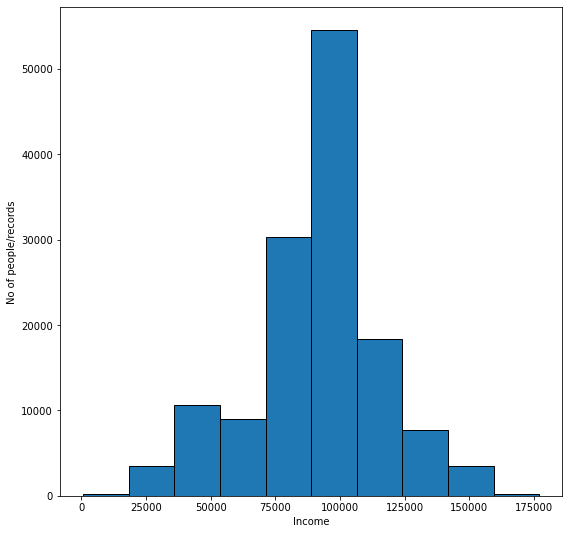

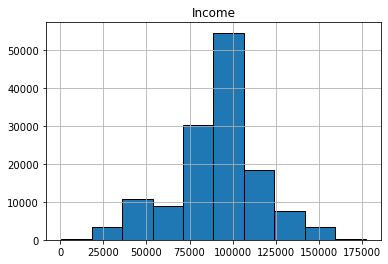

In [21]:
#Plotting a histogram using matplotlib

import numpy as np                       #only to check the median vlaue
import matplotlib.pyplot as plt

#sending the pyspark dataframe(df2) to pandas dataframe(pandasDF) needed for matplotlib
pandasDF = df2.toPandas()
#pandasDF

#method 1 (using ax.hist)
fig, ax = plt.subplots(figsize=(9,9))
ax.hist(pandasDF.Income, bins=10, edgecolor='black')
ax.set_ylabel('No of people/records')
ax.set_xlabel('Income')

#method 2 {using dataframe.hist('colum', bins=int, edgecolor='black')}
pandasDF.hist('Income', bins=10, edgecolor='black')

#method 3(does not work)
#plt.hist('Income', bins=10, edgecolor='black');

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

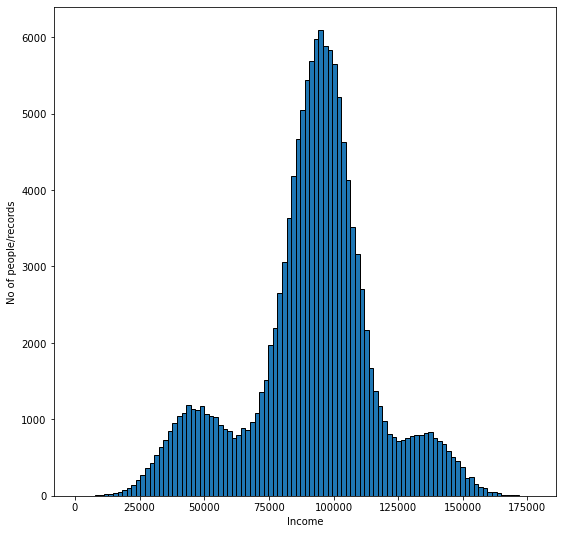

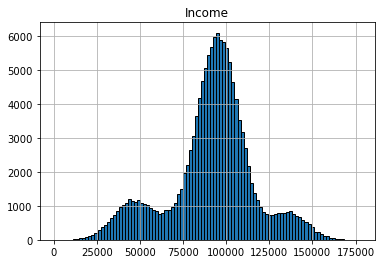

In [22]:
import numpy as np                      
import matplotlib.pyplot as plt

#sending the pyspark dataframe(df2) to pandas dataframe(pandasDF) needed for matplotlib
pandasDF = df2.toPandas()

#method 1 (using ax.hist)
fig, ax = plt.subplots(figsize=(9,9))
ax.hist(pandasDF.Income, bins=100, edgecolor='black')
ax.set_ylabel('No of people/records')
ax.set_xlabel('Income')

#method 2 {using dataframe.hist('colum', bins=int, edgecolor='black')}
pandasDF.hist('Income', bins=100, edgecolor='black')

In [ ]:
#The %matplotlib inline code will give you an error if you’re not using the Jupyter Notebook. Just comment it out and add the line plt.show() right after the point where we start making plots.